In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist

In [6]:
# Generate synthetic data
X, _ = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=42)

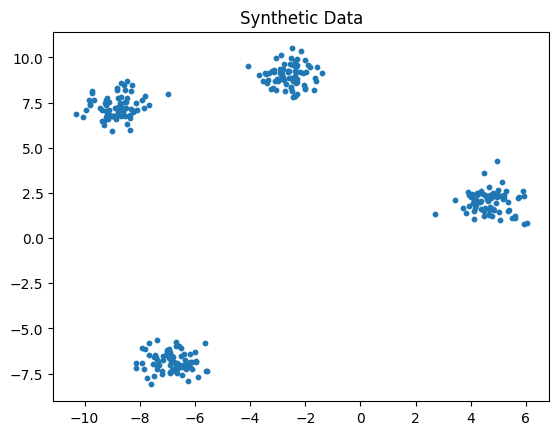

In [7]:
# Visualize the data
plt.scatter(X[:, 0], X[:, 1], s=10)
plt.title('Synthetic Data')
plt.show()

In [10]:
XA = np.array([[1, 2]])
XB = np.array([[3, 4]])
Y = cdist(XA, XB, 'euclidean')
Y

array([[2.82842712]])

In [11]:
(2*2 + 2*2) ** 0.5

2.8284271247461903

In [12]:
Y = cdist(XA, XB, 'minkowski', p=2.)
Y

array([[2.82842712]])

In [18]:
XA = np.array([[1, 2], [1,2], [3,4], [5,6]])
XB = np.array([[3, 4]])
Y = cdist(XA, XB, 'euclidean')
Y

array([[2.82842712],
       [2.82842712],
       [0.        ],
       [2.82842712]])

In [20]:
XA = np.array([[1, 2], [1,2], [3,4], [5,6]])
XB = np.array([[3, 4],[1, 2]])
Y = cdist(XA, XB, 'euclidean')
Y

array([[2.82842712, 0.        ],
       [2.82842712, 0.        ],
       [0.        , 2.82842712],
       [2.82842712, 5.65685425]])

In [21]:
XA = np.array([[1, 2]])
XB = np.array([[3, 4]])
Y = cdist(XA, XB, 'cityblock')
Y

array([[4.]])

In [22]:
Y = cdist(XA, XB, 'seuclidean', V = None)
Y

array([[2.]])

In [23]:
np.var([1,3])

np.float64(1.0)

In [24]:
Y = cdist(XA, XB, 'sqeuclidean')
Y

array([[8.]])

In [25]:
Y ** 0.5

array([[2.82842712]])

In [27]:
Y = cdist(XA, XB, 'cosine')
Y

array([[0.01613009]])

In [28]:
Y = cdist(XA, XB, 'correlation')
Y

array([[2.22044605e-16]])

In [29]:
Y = cdist(XA, XB, 'hamming')
Y

array([[1.]])

In [30]:
Y = cdist(XA, XB, 'jensenshannon')
Y

array([[0.06940679]])

In [31]:
Y = cdist(XA, XB, 'chebyshev')
Y

array([[2.]])

In [32]:
Y = cdist(XA, XB, 'canberra')
Y

array([[0.83333333]])

In [33]:
Y = cdist(XA, XB, 'braycurtis')
Y

array([[0.4]])

https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.cdist.html

In [36]:
data = np.array([[1, 1], [2, 2], [3, 3]])
individual = np.array([[1,1]])
distances = cdist(data, individual, 'euclidean')
distances

array([[0.        ],
       [1.41421356],
       [2.82842712]])

In [39]:
labels = np.argmin(distances, axis = 0)
labels

array([0])

In [40]:
data = np.array([[1, 1], [2, 2], [3, 3]])
individual = np.array([[1,1],[2, 2]])
distances = cdist(data, individual, 'euclidean')
distances

array([[0.        , 1.41421356],
       [1.41421356, 0.        ],
       [2.82842712, 1.41421356]])

In [41]:
labels = np.argmin(distances, axis = 1)
labels

array([0, 1, 1])

## silhouette_score

It ranges from -1 to +1:

Positive values indicate that data points belong to the correct clusters, indicating good clustering results.

A score of zero suggests overlapping clusters or data points equally close to multiple clusters.

Negative values indicate that data points are assigned to incorrect clusters, indicating poor clustering results.

A higher Silhouette score indicates better clustering results.

In [42]:
class GeneticAlgorithmClustering:
    def __init__(self, population_size = 50, num_clusters = 4, mutation_rate = 0.1, crossover_rate = 0.8, num_generations = 100):
        self.population_size = population_size
        self.num_clusters = num_clusters
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.num_generations = num_generations

    def _initialize_population(self, data):
        """Generate an initial population of cluster centers."""
        population = []
        for _ in range(self.population_size):
            # Randomly select k points from the data as initial centers
            centers = data[np.random.choice(data.shape[0], size = self.num_clusters, replace = False)]
            population.append(centers)
        return np.array(population)

    def _fitness(self, individual, data):
        """Evaluate the fitness of an individual (set of cluster centers)."""
        distances = cdist(data, individual, 'euclidean')  # Compute distances to all centers
        labels = np.argmin(distances, axis=1)  # Assign each point to the nearest center
        if len(np.unique(labels)) < 2:  # Avoid division by zero in silhouette score
            return -np.inf
        score = silhouette_score(data, labels)
        return score

    def _select_parents(self, population, fitness_scores):
        """Select parents using tournament selection."""
        parent1_idx = np.argmax(fitness_scores)
        fitness_scores[parent1_idx] = -np.inf  # Avoid selecting the same individual twice
        parent2_idx = np.argmax(fitness_scores)
        return population[parent1_idx], population[parent2_idx]

    def _crossover(self, parent1, parent2):
        """Perform crossover between two parents."""
        if np.random.rand() < self.crossover_rate:
            midpoint = np.random.randint(1, self.num_clusters)
            child1 = np.concatenate((parent1[:midpoint], parent2[midpoint:]))
            child2 = np.concatenate((parent2[:midpoint], parent1[midpoint:]))
            return child1, child2
        return parent1, parent2

    def _mutate(self, individual):
        """Mutate an individual by randomly perturbing cluster centers."""
        for i in range(self.num_clusters):
            if np.random.rand() < self.mutation_rate:
                noise = np.random.normal(0, 0.1, size=individual.shape[1])
                individual[i] += noise
        return individual

    def evolve(self, data):
        """Run the genetic algorithm to find the best cluster centers."""
        population = self._initialize_population(data)

        for generation in range(self.num_generations):
            fitness_scores = [self._fitness(individual, data) for individual in population]
            new_population = []

            for _ in range(self.population_size // 2):
                parent1, parent2 = self._select_parents(population, fitness_scores)
                child1, child2 = self._crossover(parent1, parent2)
                child1 = self._mutate(child1)
                child2 = self._mutate(child2)
                new_population.extend([child1, child2])

            population = np.array(new_population)

        # Select the best individual
        fitness_scores = [self._fitness(individual, data) for individual in population]
        best_centers = population[np.argmax(fitness_scores)]
        return best_centers

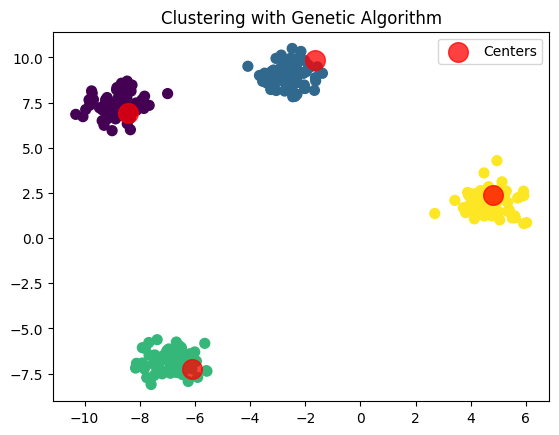

In [43]:
# Initialize GA
ga_clustering = GeneticAlgorithmClustering(population_size=50, num_clusters=4, mutation_rate=0.1, crossover_rate=0.8, num_generations=100)

# Find the best cluster centers using GA
best_centers = ga_clustering.evolve(X)

# Assign each point to the nearest center
distances = cdist(X, best_centers, 'euclidean')
labels = np.argmin(distances, axis=1)

# Visualize the results
plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
plt.scatter(best_centers[:, 0], best_centers[:, 1], c='red', s=200, alpha=0.75, label='Centers')
plt.title('Clustering with Genetic Algorithm')
plt.legend()
plt.show()

In [44]:
def present():
    # Visualize the results
    plt.scatter(X[:, 0], X[:, 1], c=labels, s=50, cmap='viridis')
    plt.scatter(best_centers[:, 0], best_centers[:, 1], c='red', s=200, alpha=0.75, label='Centers')
    plt.title('Clustering with Genetic Algorithm')
    plt.legend()
    plt.show()

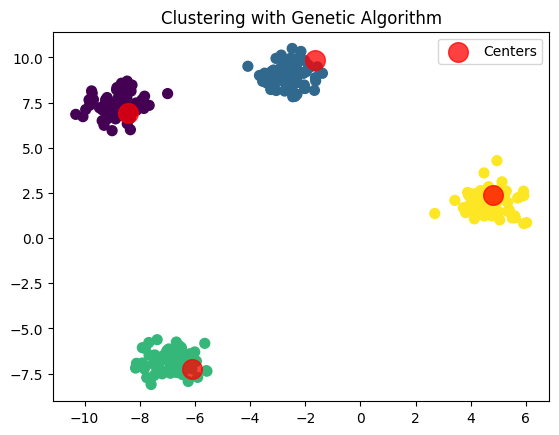

In [45]:
present()

In [52]:
class GeneticAlgorithmClustering:
    def __init__(self, population_size = 50, num_clusters = 4, mutation_rate = 0.1, crossover_rate = 0.8, num_generations = 100):
        self.population_size = population_size
        self.num_clusters = num_clusters
        self.mutation_rate = mutation_rate
        self.crossover_rate = crossover_rate
        self.num_generations = num_generations

    def _initialize_population(self, data):
        """Generate an initial population of cluster centers."""
        population = []
        for _ in range(self.population_size):
            # Randomly select k points from the data as initial centers
            centers = data[np.random.choice(data.shape[0], size = self.num_clusters, replace = False)]
            population.append(centers)
        return np.array(population)

    def _fitness(self, individual, data):
        """Evaluate the fitness of an individual (set of cluster centers)."""
        distances = cdist(data, individual, 'euclidean')  # Compute distances to all centers
        labels = np.argmin(distances, axis=1)  # Assign each point to the nearest center
        if len(np.unique(labels)) < 2:  # Avoid division by zero in silhouette score
            return -np.inf
        score = silhouette_score(data, labels)
        return score

    def _select_parents(self, population, fitness_scores):
        """Select parents using tournament selection."""
        parent1_idx = np.argmax(fitness_scores)
        fitness_scores[parent1_idx] = -np.inf  # Avoid selecting the same individual twice
        parent2_idx = np.argmax(fitness_scores)
        return population[parent1_idx], population[parent2_idx]

    def _crossover(self, parent1, parent2):
        """Perform crossover between two parents."""
        if np.random.rand() < self.crossover_rate:
            midpoint = np.random.randint(1, self.num_clusters)
            child1 = np.concatenate((parent1[:midpoint], parent2[midpoint:]))
            child2 = np.concatenate((parent2[:midpoint], parent1[midpoint:]))
            return child1, child2
        return parent1, parent2

    def _mutate(self, individual):
        """Mutate an individual by randomly perturbing cluster centers."""
        for i in range(self.num_clusters):
            if np.random.rand() < self.mutation_rate:
                noise = np.random.normal(0, 0.1, size=individual.shape[1])
                individual[i] += noise
        return individual

    def evolve(self, data):
        """Run the genetic algorithm to find the best cluster centers."""
        population = self._initialize_population(data)

        for generation in range(self.num_generations):
            fitness_scores = [self._fitness(individual, data) for individual in population]
            new_population = []

            for _ in range(self.population_size // 2):
                parent1, parent2 = self._select_parents(population, fitness_scores)
                child1, child2 = self._crossover(parent1, parent2)
                child1 = self._mutate(child1)
                child2 = self._mutate(child2)
                new_population.extend([child1, child2])

            population = np.array(new_population)
            best_centers = population[np.argmax(fitness_scores)]
            plt.figure()
            present()
        # Select the best individual
        fitness_scores = [self._fitness(individual, data) for individual in population]
        best_centers = population[np.argmax(fitness_scores)]
        return best_centers

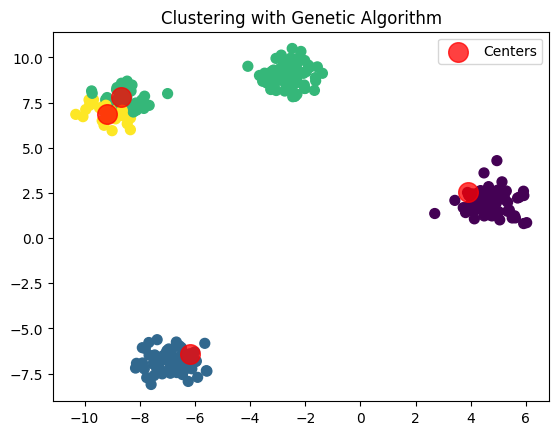

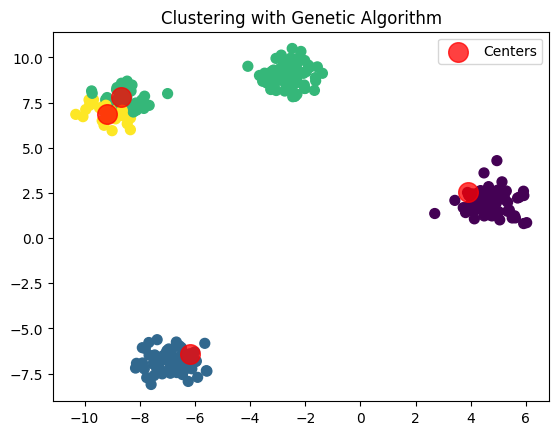

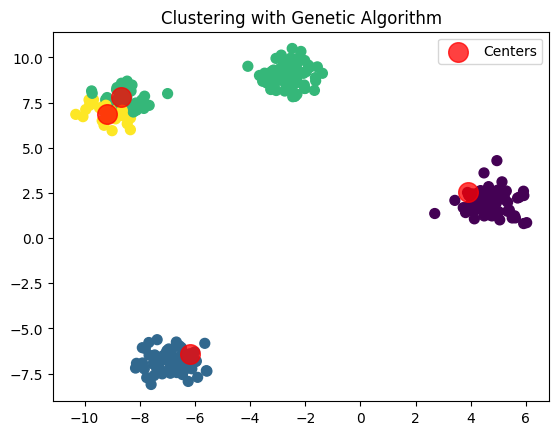

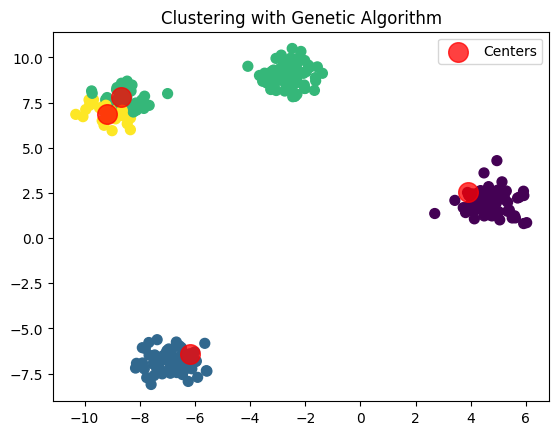

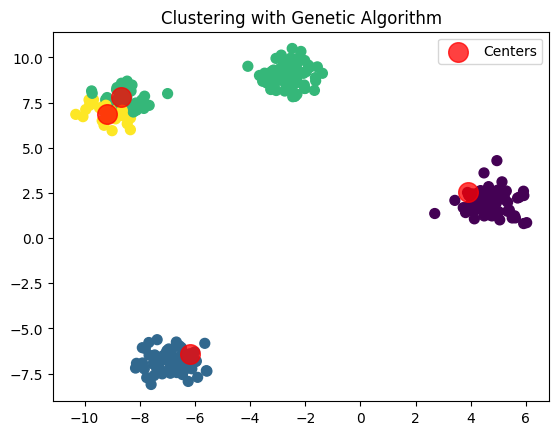

In [57]:
# Initialize GA
ga_clustering = GeneticAlgorithmClustering(population_size=5, num_clusters=4, mutation_rate=0.1, crossover_rate=0.8, num_generations=5)

# Find the best cluster centers using GA
best_centers = ga_clustering.evolve(X)

# Assign each point to the nearest center
distances = cdist(X, best_centers, 'euclidean')
labels = np.argmin(distances, axis=1)

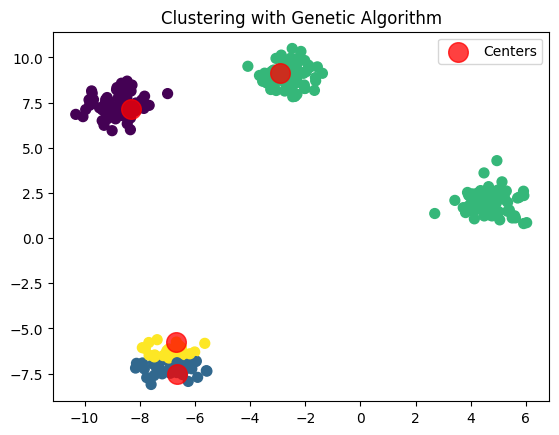

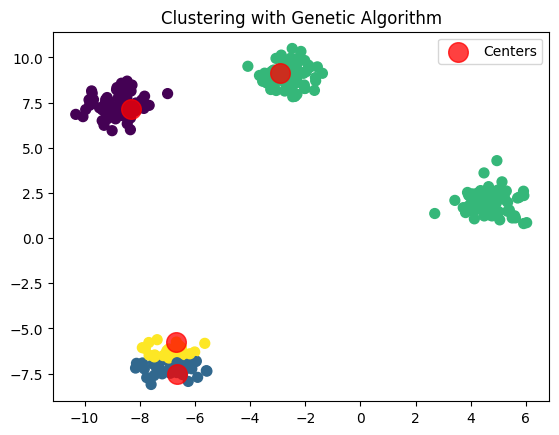

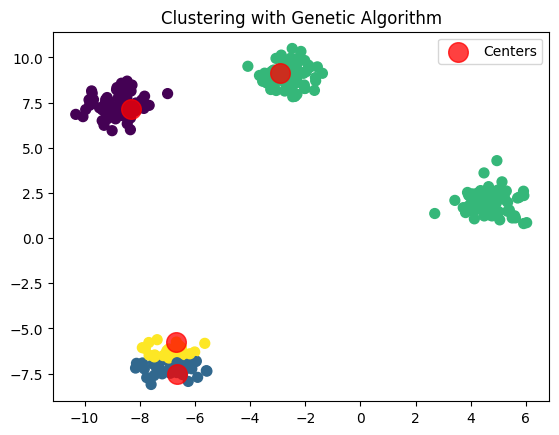

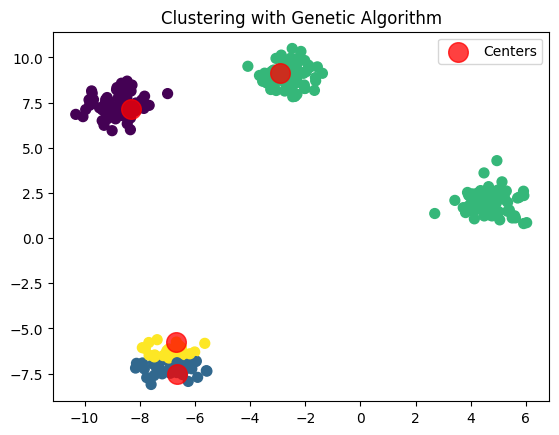

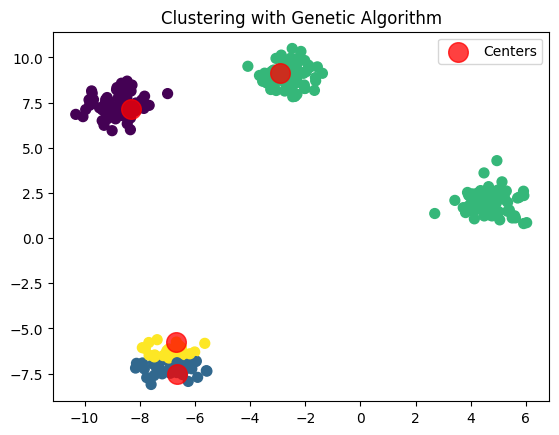

In [58]:
# Initialize GA
ga_clustering = GeneticAlgorithmClustering(population_size=10, num_clusters=4, mutation_rate=0.1, crossover_rate=0.8, num_generations=5)

# Find the best cluster centers using GA
best_centers = ga_clustering.evolve(X)

# Assign each point to the nearest center
distances = cdist(X, best_centers, 'euclidean')
labels = np.argmin(distances, axis=1)

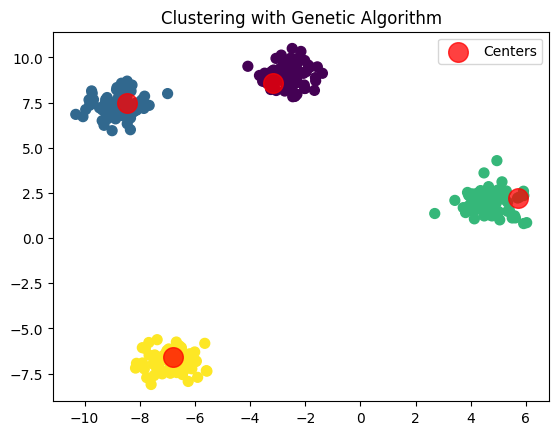

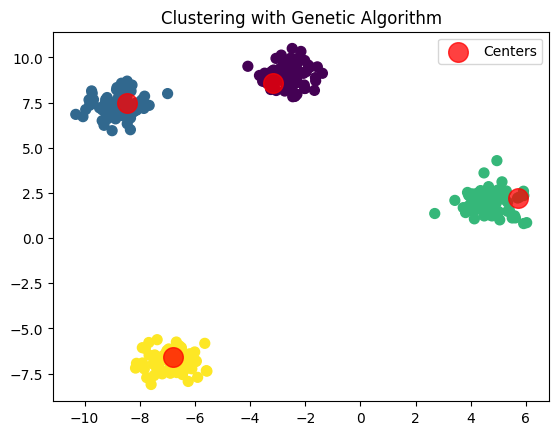

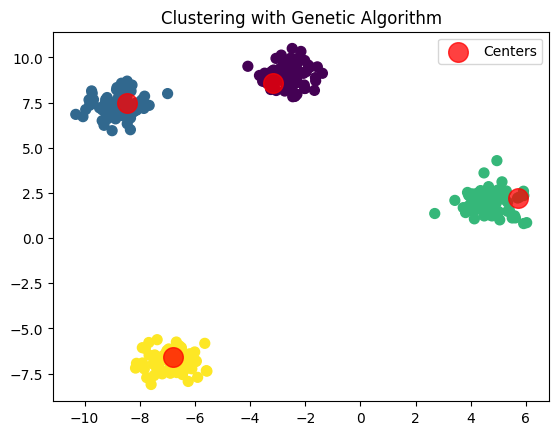

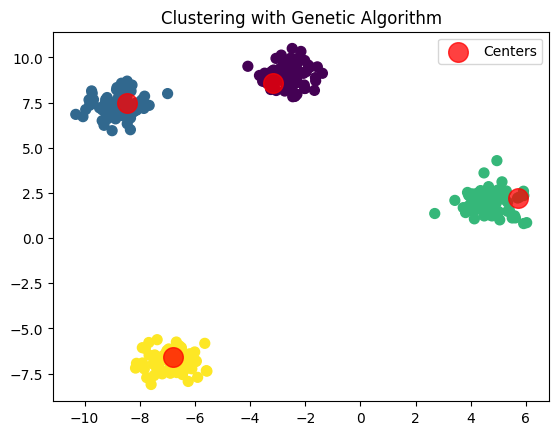

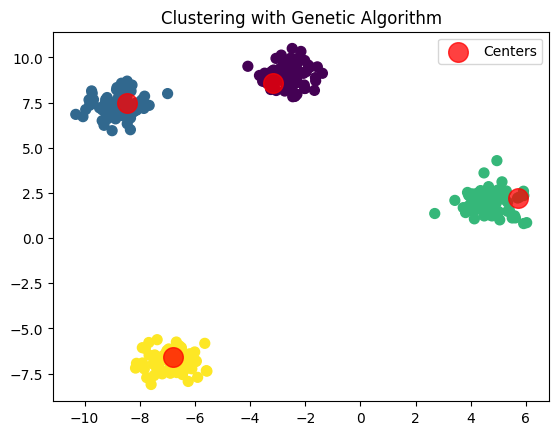

In [59]:
# Initialize GA
ga_clustering = GeneticAlgorithmClustering(population_size=50, num_clusters=4, mutation_rate=0.1, crossover_rate=0.8, num_generations=5)

# Find the best cluster centers using GA
best_centers = ga_clustering.evolve(X)

# Assign each point to the nearest center
distances = cdist(X, best_centers, 'euclidean')
labels = np.argmin(distances, axis=1)